In [17]:
#import libarys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
#Import packages for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import median,mean

In [18]:
dataNetflix = pd.read_csv("C:/Users/oisin/Downloads/CLeanNetflixData.csv")
dataNetflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"7.4 based on 22,005 user ratings"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0 based on 574 user ratings
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6 based on 853 user ratings
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"6.8 based on 230,888 user ratings"
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7.2 based on 12 user ratings


In [19]:
count = 0
for rating in dataNetflix.IMDB_Rating:
    value = rating.index(" ")
    rating = rating[:value]
    dataNetflix.IMDB_Rating[count] = rating
    count += 1

<ipython-input-19-8aa81166de59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNetflix.IMDB_Rating[count] = rating


In [20]:
count =0
MinNetflix = []
SeasonsNetflix = []
for TypeOfDuration in dataNetflix.duration:
    if "min" in TypeOfDuration:
        Min = dataNetflix.duration[count] , dataNetflix.IMDB_Rating[count]
        MinNetflix.append(Min)
        
    if "Season" in TypeOfDuration:
        Seasons = dataNetflix.duration[count] , dataNetflix.IMDB_Rating[count]
        SeasonsNetflix.append(Seasons)
        print(TypeOfDuration)
    count += 1
        

4 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
4 Seasons
3 Seasons
1 Season
1 Season
1 Season
1 Season
2 Seasons
2 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
3 Seasons
1 Season
1 Season
1 Season
2 Seasons
1 Season
1 Season
1 Season
2 Seasons
2 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
2 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
3 Seasons
1 Season
2 Seasons
1 Season
1 Season
1 Season
1 Season
4 Seasons
1 Season
1 Season
1 Season
1 Season
2 Seasons
5 Seasons
1 Season
1 Season
1 Season
5 Seasons
2 Seasons
2 Seasons
1 Season
1 Season
2 Seasons
3 Seasons
9 Seasons
1 Season
2 Seasons
1 Season
1 Season
1 Season
3 Seasons
1 Season
1 Season
3 Seasons
1 Season
1 Season
1 Season
5 Seasons
1 Season
1 Season
2 Seasons
2 Seasons
1 Season
1 Season
1 Season
5 Seasons
8 Seasons
1 Season
3 Season

3 Seasons
1 Season
1 Season
3 Seasons
2 Seasons
2 Seasons
2 Seasons
8 Seasons
1 Season
1 Season
1 Season
1 Season
3 Seasons
1 Season
1 Season
3 Seasons
3 Seasons
2 Seasons
1 Season
1 Season
6 Seasons
1 Season
1 Season
1 Season
2 Seasons
2 Seasons
1 Season
1 Season
1 Season
3 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
7 Seasons
2 Seasons
6 Seasons
1 Season
2 Seasons
5 Seasons
1 Season
1 Season
2 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
3 Seasons
2 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
2 Seasons
1 Season
1 Season
1 Season
2 Seasons
1 Season
1 Season
5 Seasons
2 Seasons
4 Seasons
1 Season
3 Seasons
1 Season
1 Season
2 Seasons
2 Seasons
2 Seasons
1 Season
1 Season
2 Seasons
1 Season
2 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
1 Season
6 Seasons
1 Season
1 Season
1 Season
3 Seasons
1 Season
3 Seasons
1 Season
3 Seasons
1 Season
1 Season
1 Season
1 Season
1 Season
4 Seasons
2 Seasons
4 Seaso

In [21]:
SeasonsNetflix

[('4 Seasons', '7.4'),
 ('1 Season', '7.2'),
 ('1 Season', '6.8'),
 ('1 Season', '7.3'),
 ('1 Season', '6.4'),
 ('1 Season', '5.6'),
 ('1 Season', '7.5'),
 ('1 Season', '5.7'),
 ('1 Season', '4.4'),
 ('1 Season', '7.3'),
 ('4 Seasons', '7.6'),
 ('3 Seasons', '6.5'),
 ('1 Season', '6.9'),
 ('1 Season', '5.1'),
 ('1 Season', '6.2'),
 ('1 Season', '5.9'),
 ('2 Seasons', '7.8'),
 ('2 Seasons', '6.3'),
 ('1 Season', '7.7'),
 ('1 Season', '6.8'),
 ('1 Season', '5.8'),
 ('1 Season', '6.6'),
 ('1 Season', '6.7'),
 ('1 Season', '6.3'),
 ('1 Season', '7.0'),
 ('1 Season', '6.7'),
 ('1 Season', '1.9'),
 ('1 Season', '8.1'),
 ('1 Season', '8.7'),
 ('1 Season', '6.3'),
 ('1 Season', '8.0'),
 ('1 Season', '7.2'),
 ('1 Season', '6.1'),
 ('1 Season', '7.3'),
 ('1 Season', '6.1'),
 ('3 Seasons', '7.8'),
 ('1 Season', '6.7'),
 ('1 Season', '8.0'),
 ('1 Season', '8.5'),
 ('2 Seasons', '7.8'),
 ('1 Season', '7.5'),
 ('1 Season', '6.4'),
 ('1 Season', '6.9'),
 ('2 Seasons', '7.7'),
 ('2 Seasons', '8.4'),
 

In [22]:
#DataFrameNetflix = pd.DataFrame(SeasonsNetflix)
DataFrameNetflixMIN = pd.DataFrame(data=(MinNetflix),columns=["Min", "Rating"])
DataFrameNetflixSEASON = pd.DataFrame(data=(SeasonsNetflix),columns=["Season", "Rating"])

In [23]:
DataFrameNetflixSEASON.head(5)

,Season,Rating
0,4 Seasons,7.4
1,1 Season,7.2
2,1 Season,6.8
3,1 Season,7.3
4,1 Season,6.4


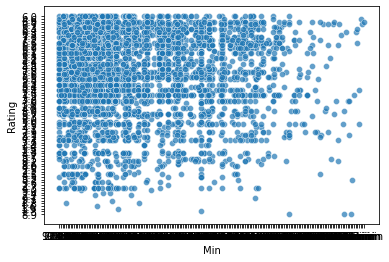

In [24]:
sns.scatterplot(data=DataFrameNetflixMIN, x='Min', y='Rating', alpha=0.7) 

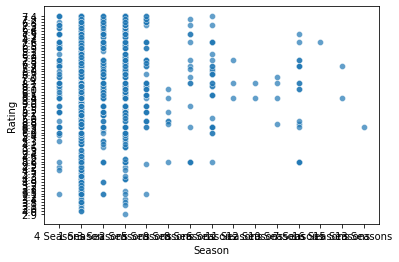

In [25]:
a4_dims = (11.7, 8.27)
sns.scatterplot(data=DataFrameNetflixSEASON, x='Season', y='Rating', alpha=0.7, sizes=(2000, 2000)) 

In [26]:
count = 0
for rating in DataFrameNetflixSEASON.Season:
    value = rating.index(" ")
    rating = rating[:value]
    DataFrameNetflixSEASON.Season[count] = rating
    count += 1

In [27]:
DataFrameNetflixSEASON.Season

0       4
1       1
2       1
3       1
4       1
       ..
1997    1
1998    1
1999    2
2000    1
2001    1
Name: Season, Length: 2002, dtype: object

In [28]:
X = DataFrameNetflixSEASON.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
print(X)

Y = DataFrameNetflixSEASON.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
print(Y)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
print(Y_pred)

[['4']
 ['1']
 ['1']
 ...
 ['2']
 ['1']
 ['1']]
[['7.4']
 ['7.2']
 ['6.8']
 ...
 ['6.0']
 ['6.0']
 ['6.9']]
[[7.4116816 ]
 [6.98348578]
 [6.98348578]
 ...
 [7.12621772]
 [6.98348578]
 [6.98348578]]


In [29]:
# X.shape should be (N, M) where M >= 1
X = DataFrameNetflixSEASON['Season']  
# y.shape should be (N, 1)
Y = DataFrameNetflixSEASON['Rating'] 
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2)

In [30]:
X_train.shape, Y_train.shape

((1601, 1), (1601, 1))

In [31]:
X_test.shape, Y_test.shape

((401, 1), (401, 1))

In [32]:
model = linear_model.LinearRegression()

In [33]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
Y_pred = model.predict(Y_test)

In [57]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [[0.14083015]]
Intercept: [6.83679697]
Mean squared error (MSE): 1.41
Coefficient of determination (R^2): -0.16


In [58]:
r2_score(Y_test, Y_pred)

-0.16431544531776154

In [59]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

In [60]:

'%f' % 0.523810833536016

'0.523811'

In [61]:
np.array(Y_test)

array([['7.1'],
       ['7.8'],
       ['6.7'],
       ['7.1'],
       ['6.9'],
       ['8.0'],
       ['7.6'],
       ['8.0'],
       ['7.2'],
       ['5.6'],
       ['8.6'],
       ['8.2'],
       ['6.6'],
       ['5.8'],
       ['7.0'],
       ['9.3'],
       ['6.5'],
       ['7.0'],
       ['7.3'],
       ['6.6'],
       ['8.4'],
       ['6.2'],
       ['7.5'],
       ['4.3'],
       ['6.3'],
       ['7.3'],
       ['6.9'],
       ['8.1'],
       ['4.6'],
       ['7.5'],
       ['6.7'],
       ['7.0'],
       ['6.9'],
       ['5.4'],
       ['7.6'],
       ['6.9'],
       ['7.3'],
       ['7.1'],
       ['7.3'],
       ['7.1'],
       ['5.7'],
       ['7.5'],
       ['7.6'],
       ['8.3'],
       ['8.1'],
       ['7.6'],
       ['8.2'],
       ['6.5'],
       ['5.6'],
       ['5.9'],
       ['4.8'],
       ['5.7'],
       ['8.3'],
       ['7.4'],
       ['6.1'],
       ['6.9'],
       ['7.3'],
       ['7.8'],
       ['7.9'],
       ['6.2'],
       ['7.4'],
       ['7.9'],
       [

In [62]:
Y_pred

array([[7.83669107],
       [7.93527218],
       [7.78035901],
       [7.83669107],
       [7.80852504],
       [7.96343821],
       [7.90710615],
       [7.96343821],
       [7.85077408],
       [7.62544584],
       [8.0479363 ],
       [7.99160424],
       [7.76627599],
       [7.65361187],
       [7.82260805],
       [8.14651741],
       [7.75219298],
       [7.82260805],
       [7.8648571 ],
       [7.76627599],
       [8.01977027],
       [7.70994393],
       [7.89302313],
       [7.44236664],
       [7.72402695],
       [7.8648571 ],
       [7.80852504],
       [7.97752122],
       [7.48461568],
       [7.89302313],
       [7.78035901],
       [7.82260805],
       [7.80852504],
       [7.59727981],
       [7.90710615],
       [7.80852504],
       [7.8648571 ],
       [7.83669107],
       [7.8648571 ],
       [7.83669107],
       [7.63952885],
       [7.89302313],
       [7.90710615],
       [8.00568725],
       [7.97752122],
       [7.90710615],
       [7.99160424],
       [7.752

<function matplotlib.pyplot.show(*args, **kw)>

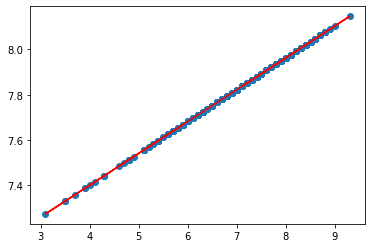

In [65]:
#hash(tuple(np.array([1,2,3,4])))
plt.scatter(Y_test.astype(float),Y_pred.astype(float))
plt.plot(Y_test.astype(float),Y_pred,color = "red")
plt.show

In [66]:
dataNetflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_Rating
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,7.4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,6.8
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7.2


# Lets try with a different split 30 / 70 

In [71]:
# X.shape should be (N, M) where M >= 1
X = DataFrameNetflixSEASON['Season']  
# y.shape should be (N, 1)
Y = DataFrameNetflixSEASON['Rating'] 
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3)
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(Y_test)

In [72]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [[0.14264342]]
Intercept: [6.86193202]
Mean squared error (MSE): 1.62
Coefficient of determination (R^2): -0.25


<function matplotlib.pyplot.show(*args, **kw)>

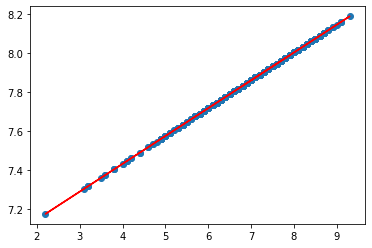

In [73]:
#hash(tuple(np.array([1,2,3,4])))
plt.scatter(Y_test.astype(float),Y_pred.astype(float))
plt.plot(Y_test.astype(float),Y_pred,color = "red")
plt.show

# Lets try with a different split 40 / 60

In [79]:
# X.shape should be (N, M) where M >= 1
X = DataFrameNetflixSEASON['Season']  
# y.shape should be (N, 1)
Y = DataFrameNetflixSEASON['Rating'] 
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3)
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(Y_test)

In [80]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [[0.13886056]]
Intercept: [6.84252208]
Mean squared error (MSE): 1.47
Coefficient of determination (R^2): -0.14


<function matplotlib.pyplot.show(*args, **kw)>

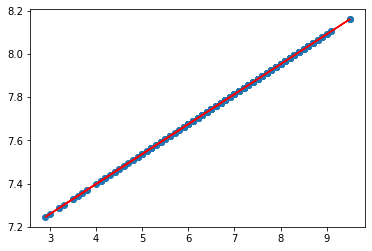

In [81]:
#hash(tuple(np.array([1,2,3,4])))
plt.scatter(Y_test.astype(float),Y_pred.astype(float))
plt.plot(Y_test.astype(float),Y_pred,color = "red")
plt.show

# Lets try with mins

In [84]:
DataFrameNetflixMIN['Min'] 
count = 0
for rating in DataFrameNetflixMIN.Min:
    value = rating.index(" ")
    rating = rating[:value]
    DataFrameNetflixMIN.Min[count] = rating
    count += 1

In [85]:
# X.shape should be (N, M) where M >= 1
X = DataFrameNetflixMIN['Min']  
# y.shape should be (N, 1)
Y = DataFrameNetflixMIN['Rating'] 
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3)
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(Y_test)

<function matplotlib.pyplot.show(*args, **kw)>

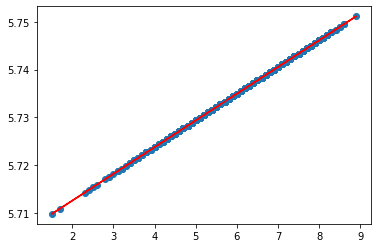

In [86]:
#hash(tuple(np.array([1,2,3,4])))
plt.scatter(Y_test.astype(float),Y_pred.astype(float))
plt.plot(Y_test.astype(float),Y_pred,color = "red")
plt.show